In [1]:
%matplotlib notebook
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

N = 250
beta = 0.2

In [2]:
def createMatrix(N):
    return np.ones((N,N), dtype=bool)

In [3]:
def energy(z):
    zp = np.copy(z).astype('float32')
    zp = 2*(zp - 0.5)
    return -1 * (np.sum(zp[0:N-1,:]*z[1:N,:]) + np.sum(zp[:,0:N-1]*z[:,1:N]))

In [4]:
def proposal(z):
    zp = np.copy(z)
    i = np.random.randint(0,N)
    j = np.random.randint(0,N)
    zp[i,j] = (zp[i,j]==False)
    return zp

In [5]:
def prob_acc_MH(z_new, z_old):
    return min(1, np.exp(-beta*(energy(z_new)-energy(z_old))))

In [6]:
def sample(z_old):
    z_new = proposal(z_old)
    accept = np.random.random() < prob_acc_MH(z_new,z_old)
    if accept:
        return z_new
    else:
        return z_old

In [7]:
def build_chain(initial_matrix, n_total):
    chain = [initial_matrix]
    for i in range(n_total):
        state = sample(chain[-1])
        chain.append(state)
        if i % (n_total//20) == 0:
            print("ready for", 5*(i//(n_total//20)), "%")
    print("ready for", 100, "%")
        
    return chain

In [8]:
def f(z):
    zp = np.copy(z).astype('float32')
    zp = 2*(zp - 0.5)
    return np.sum(zp)/(N*N)

In [9]:
z = createMatrix(N)
chain = build_chain(z, 10**6)

ready for 0 %
ready for 5 %
ready for 10 %
ready for 15 %
ready for 20 %
ready for 25 %
ready for 30 %
ready for 35 %
ready for 40 %
ready for 45 %
ready for 50 %
ready for 55 %
ready for 60 %
ready for 65 %
ready for 70 %
ready for 75 %
ready for 80 %
ready for 85 %
ready for 90 %
ready for 95 %
ready for 100 %


ready for 5 %
ready for 10 %
ready for 15 %
ready for 20 %
ready for 25 %
ready for 30 %
ready for 35 %
ready for 40 %
ready for 45 %
ready for 50 %
ready for 55 %
ready for 60 %
ready for 65 %
ready for 70 %
ready for 75 %
ready for 80 %
ready for 85 %
ready for 90 %
ready for 95 %
ready for 100 %


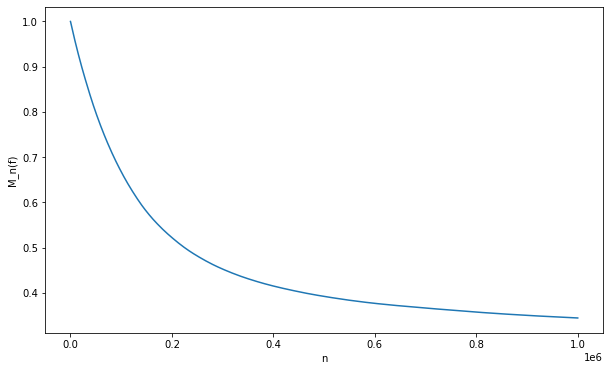

In [10]:
lim = 10**6
E = np.zeros(lim)
E[0] = f(chain[0])
for i in range(1,lim):
    E[i] = 1/i * ((i-1)*E[i-1] + f(chain[i])) #rekursive Aufbau von E_\mu(f)
    if i % (lim//20) == 0:
        print("ready for", 5*(i//(lim//20)), "%") 
print("ready for", 100, "%")
xses = range(1,lim)
yses = [E[x] for x in xses]
fig, ax = plt.subplots()
ax.plot(xses, yses)
plt.xlabel("n")
plt.ylabel("M_n(f)")
plt.show()